In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/Shareddrives/CS 152/dataset/cyberbullying_tweets.csv')  

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
# df = df[df["cyberbullying_type"]!="other_cyberbullying"]
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

<Axes: xlabel='cyberbullying_type', ylabel='count'>

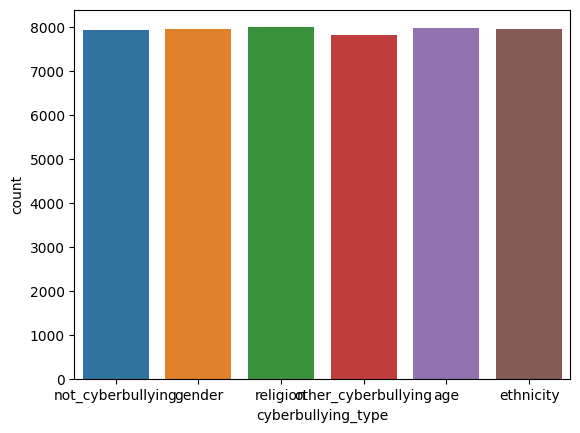

In [ ]:
sns.countplot(data = df, x = 'cyberbullying_type')

In [ ]:
import re
import demoji
import string

In [ ]:
def clean_text(text):
    
    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    # Make all text lowercase
    text = text.lower()
    
    # Removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)

    # Taking care of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [ ]:
df['cleaned_text'] = df['tweet_text'].apply(lambda text: clean_text(text))  #

In [ ]:
df['cleaned_text']

0               in other words  your food was crapilicious
1                                          why is so white
2               a classy whore or more red velvet cupcakes
3        gio meh p thanks for the heads up but not too ...
4        this is an isis account pretending to be a kur...
                               ...                        
47687    black ppl arent expected to do anything depend...
47688    turner did not withhold his disappointment tur...
47689    i swear to god this dumb nigger bitch i have g...
47690    yea fuck you therealexel if youre a nigger fuc...
47691    bro u gotta chill chillshrammy dog fuck kp tha...
Name: cleaned_text, Length: 47692, dtype: object

In [ ]:
df['cleaned_text'].duplicated().sum() # Checking for duplicate values


2550

In [ ]:
df.drop_duplicates("cleaned_text", inplace = True)


In [ ]:
#df = df[df["cyberbullying_type"]!="other_cyberbullying"]


In [ ]:
df['cyberbullying_type'].value_counts()


religion               7956
age                    7934
ethnicity              7869
not_cyberbullying      7737
gender                 7674
other_cyberbullying    5972
Name: cyberbullying_type, dtype: int64

<Axes: xlabel='cyberbullying_type', ylabel='count'>

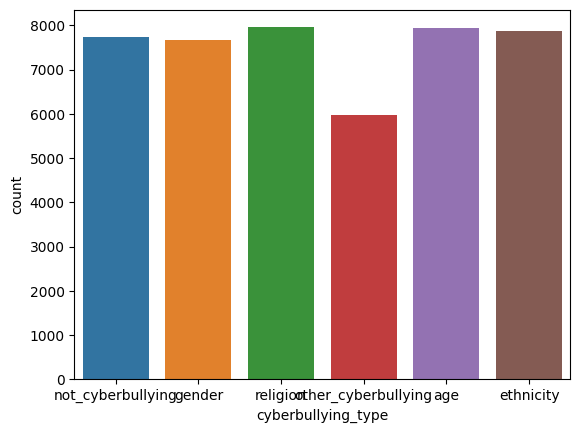

In [ ]:
sns.countplot(data = df, x = 'cyberbullying_type')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print(df.columns)
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})
df["sentiment"].replace({"not_cyberbullying": 0, "gender": 1, "religion": 2, "age": 3,  "ethnicity": 4,"other_cyberbullying":5}, inplace=True)
sentiments = ["not bullying","gender", "religion","age","ethnicity"]
X = df['cleaned_text']  # Feature (raw data)
y = df['sentiment']  # Target Label


Index(['tweet_text', 'cyberbullying_type', 'cleaned_text'], dtype='object')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [ ]:
tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv =  clf.fit_transform(df['cleaned_text'])

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['sentiment'], test_size = 0.2, random_state = 42)

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
preds_log_model = log_model.predict(X_test)
print(classification_report(y_test, preds_log_model))


              precision    recall  f1-score   support

           0       0.59      0.68      0.63      1611
           1       0.91      0.82      0.86      1530
           2       0.94      0.94      0.94      1573
           3       0.96      0.96      0.96      1565
           4       0.97      0.96      0.97      1591
           5       0.57      0.54      0.55      1159

    accuracy                           0.83      9029
   macro avg       0.82      0.82      0.82      9029
weighted avg       0.83      0.83      0.83      9029



In [ ]:
# for x,y_pred in zip(X_test, preds_log_model):
#     print(x)
#     print(y_pred)
print(X_train)

  (0, 40002)	0.5087781584160371
  (0, 31315)	0.4610116107611812
  (0, 16902)	0.5087781584160371
  (0, 10005)	0.45418006375824704
  (0, 7176)	0.25194907315865883
  (1, 47350)	0.47527004343016077
  (1, 47198)	0.16730955687513796
  (1, 46887)	0.15431914447974057
  (1, 46392)	0.18053363571106887
  (1, 43414)	0.0762247456921503
  (1, 42727)	0.20864015853390275
  (1, 42693)	0.09541472225612392
  (1, 39597)	0.2815519921992048
  (1, 34561)	0.2526038674642381
  (1, 30755)	0.18019786717550831
  (1, 30355)	0.1499586070247168
  (1, 30057)	0.1374642982657289
  (1, 26601)	0.17799796621818717
  (1, 22303)	0.211048930968922
  (1, 22117)	0.09059533712758701
  (1, 21779)	0.24199351600144725
  (1, 17728)	0.14472933528602402
  (1, 16981)	0.11852165705741041
  (1, 15847)	0.1877867114908579
  (1, 7523)	0.16393484631346214
  :	:
  (36112, 34411)	0.23322019546239303
  (36112, 33081)	0.23322019546239303
  (36112, 31087)	0.21383622320731338
  (36112, 30741)	0.09959026728033694
  (36112, 30118)	0.136011228280557

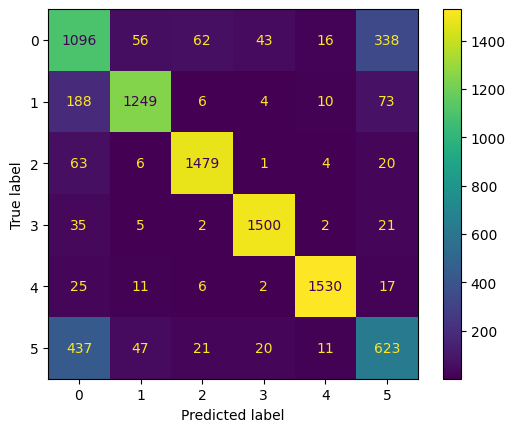

In [ ]:
cmat=ConfusionMatrixDisplay(confusion_matrix(y_test,preds_log_model ),display_labels=log_model.classes_)
cmat.plot()


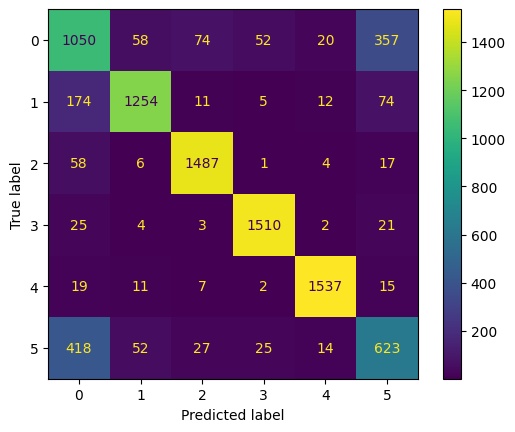

In [ ]:
cmat=ConfusionMatrixDisplay(confusion_matrix(y_test,preds_log_model ),display_labels=log_model.classes_)
cmat.plot()


In [ ]:
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size = 0.2, random_state = 42)
pipe = Pipeline([('clf' ,CountVectorizer()),('tfidf', TfidfTransformer(use_idf=True)), ('lr_model', LogisticRegression(max_iter=1000))])
pipe.fit(X_train.to_list(), y_train.to_list())

Pipeline(steps=[('clf', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('lr_model', LogisticRegression(max_iter=1000))])

In [ ]:
preds_log_model = pipe.predict(X_test)

In [ ]:
preds_log_model

array([0, 4, 0, ..., 3, 0, 0])

In [ ]:
def evaluate(text, pipe_model):
  if type(text)==str:
    text=[text]
  output = pipe_model.predict(text)
  return output

In [ ]:
import pickle


In [ ]:
with open('LRmodel_pipe_cyberbullying.pkl','wb') as f:
  pickle.dump(pipe,f)
def evaluateLR(text, pipe_model):
  if type(text)==str:
    text=[text]
  output = pipe_model.predict(text)
  return output

In [ ]:
evaluateLRlist(X_test)[:150]

array([1])